In [1]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np

In [2]:
folder = 'mc_500k'

results = loadmat(f"{folder}/uq_large.mat")
pressure = results["pressure"]
cov = results["cov"]
cov_mc = results["cov_mc"]

# To std
std = np.sqrt(cov)
std_mc = np.sqrt(cov_mc)

/tmp/ipykernel_242165/2976270842.py:10: RuntimeWarning: invalid value encountered in sqrt
  std_mc = np.sqrt(cov_mc)


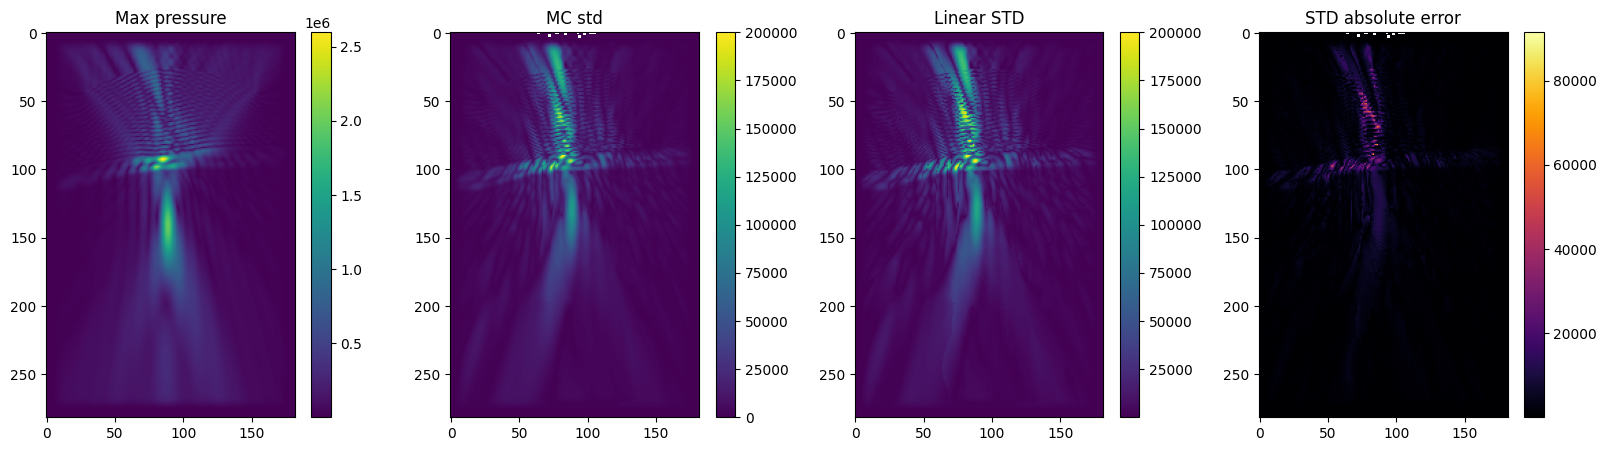

In [3]:
import numpy as np

fig, ax = plt.subplots(1,4,figsize=(20,5))

im = ax[0].imshow(pressure)
ax[0].set_title("Max pressure")
plt.colorbar(im, ax=ax[0])

im = ax[1].imshow(std_mc, vmax=2e5)
ax[1].set_title("MC std")
plt.colorbar(im, ax=ax[1])

im = ax[2].imshow(std, vmax=2e5)
ax[2].set_title("Linear STD")
plt.colorbar(im, ax=ax[2])

im = ax[3].imshow(np.abs(std - std_mc), cmap="inferno")
ax[3].set_title("STD absolute error")
plt.colorbar(im, ax=ax[3])

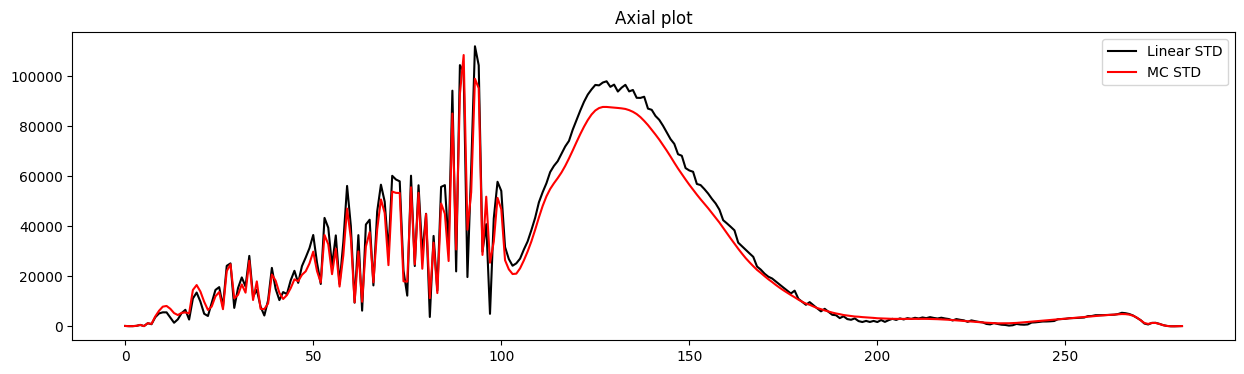

In [4]:
plt.figure(figsize=(15,4))
plt.title("Axial plot")
plt.plot(std[:,182//2], label="Linear STD", color="k")
plt.plot(std_mc[:,182//2], label="MC STD", color= "r")
plt.legend()

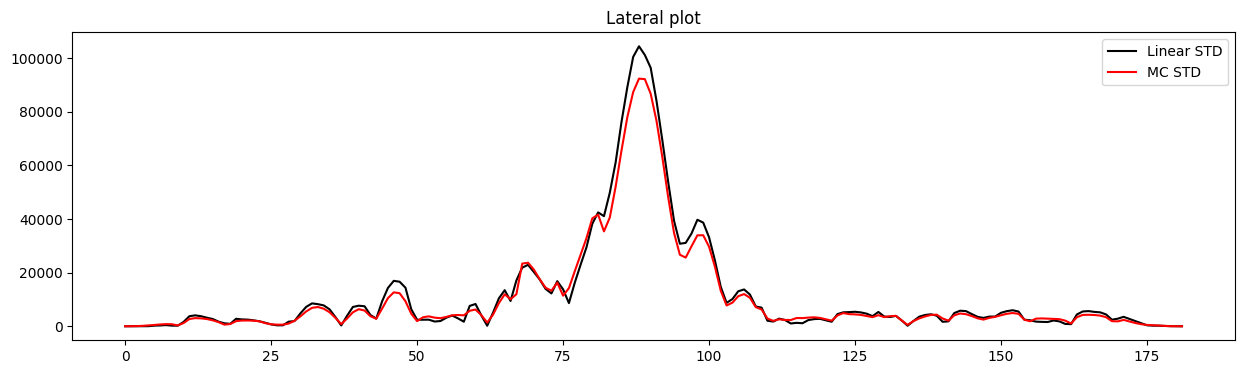

In [5]:
plt.figure(figsize=(15,4))
plt.title("Lateral plot")
plt.plot(std[282//2], label="Linear STD", color="k")
plt.plot(std_mc[282//2], label="MC STD", color= "r")
plt.legend()

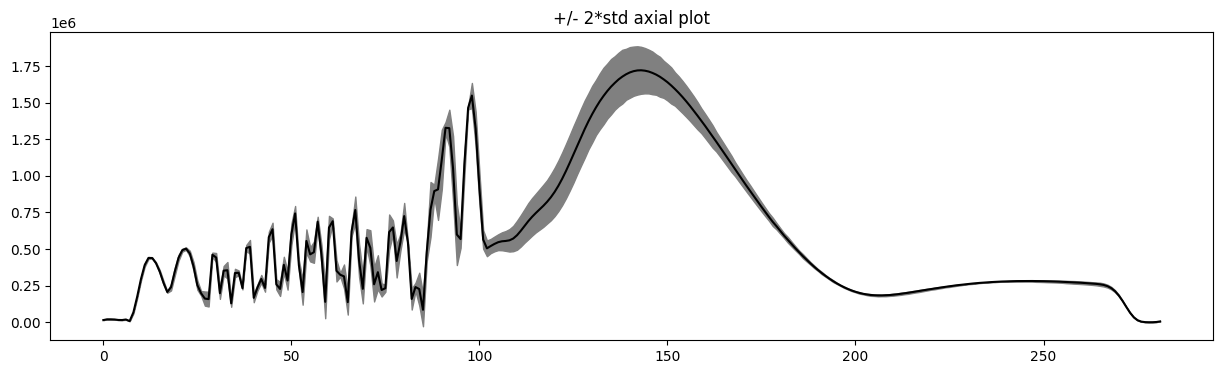

In [6]:
plt.figure(figsize=(15,4))
plt.title("+/- 2*std axial plot")
x = np.arange(pressure.shape[0])
plt.fill_between(x, pressure[:,182//2] - 2*std[:,182//2], pressure[:,182//2] + 2*std[:,182//2], color='gray')
plt.plot(pressure[:,182//2], color='k')

In [7]:
from tqdm import trange

# Loads all MC runs for the pixel [141, 91]
pix_values = []
for run in trange(200):
    mfile = loadmat(f"{folder}/mc_{run}.mat")
    pix_value = mfile["pressure"][141,91]
    pix_values.append(pix_value)
    
# Get cumulative variance
x_sq = []
x_mean = []
std_mc_over_time = []
for run in trange(1,201):
    x = pix_values[run-1]
    if run == 1:
        x_sq = [x**2]
        x_mean = [x]
        std_mc_over_time = [np.sqrt(x_sq[-1] - x_mean[-1]**2)]
    else:
        x_sq.append((x_sq[-1]*(run-1) + x**2)/run)
        x_mean.append((x_mean[-1]*(run-1) + x)/run)
        std_mc_over_time.append(np.sqrt((x_sq[-1] - x_mean[-1]**2)*run/(run-1)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 159630.98it/s]


Text(0.5, 1.0, 'Max pressure near focus')

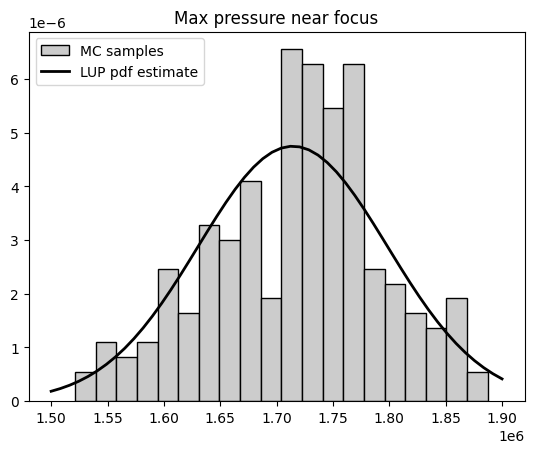

In [8]:
import scipy.stats as stats

x = np.linspace(1.5e6, 1.9e6)
mu = pressure[141,91]
std_pixel = std[141,91]
plt.hist(pix_values, density=True, bins=20, edgecolor = "black", color="#CCCCCC", label="MC samples")
plt.plot(x, stats.norm.pdf(x, mu, std_pixel), color="k", linewidth=2, label="LUP pdf estimate")
#std_mc_samples = np.std(pix_values)
#plt.plot(x, stats.norm.pdf(x, mu, std_mc_samples), color="g", linewidth=2, label="LUP pdf estimate")
plt.legend()
plt.title("Max pressure near focus")

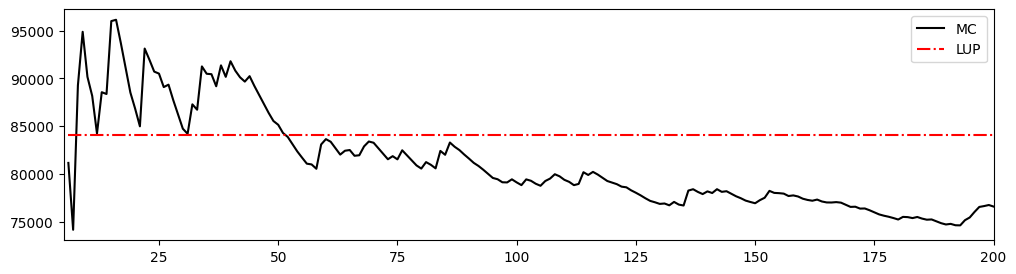

In [9]:
plt.figure(figsize=(12,3))
x = np.arange(1,201)
plt.plot(x[5:],std_mc_over_time[5:], color='k', label="MC")
plt.hlines(std_pixel, x[5], x[-1], color='r', linestyle='-.', label="LUP")
plt.xlim([5,200])
plt.legend()